# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display_html
pd.set_option('display.max_columns', 30)
pd.set_option("display.float_format", "{:.2f}".format)
import warnings
warnings.simplefilter('ignore')
#импортируем библиотеки для дальнейшей работы

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

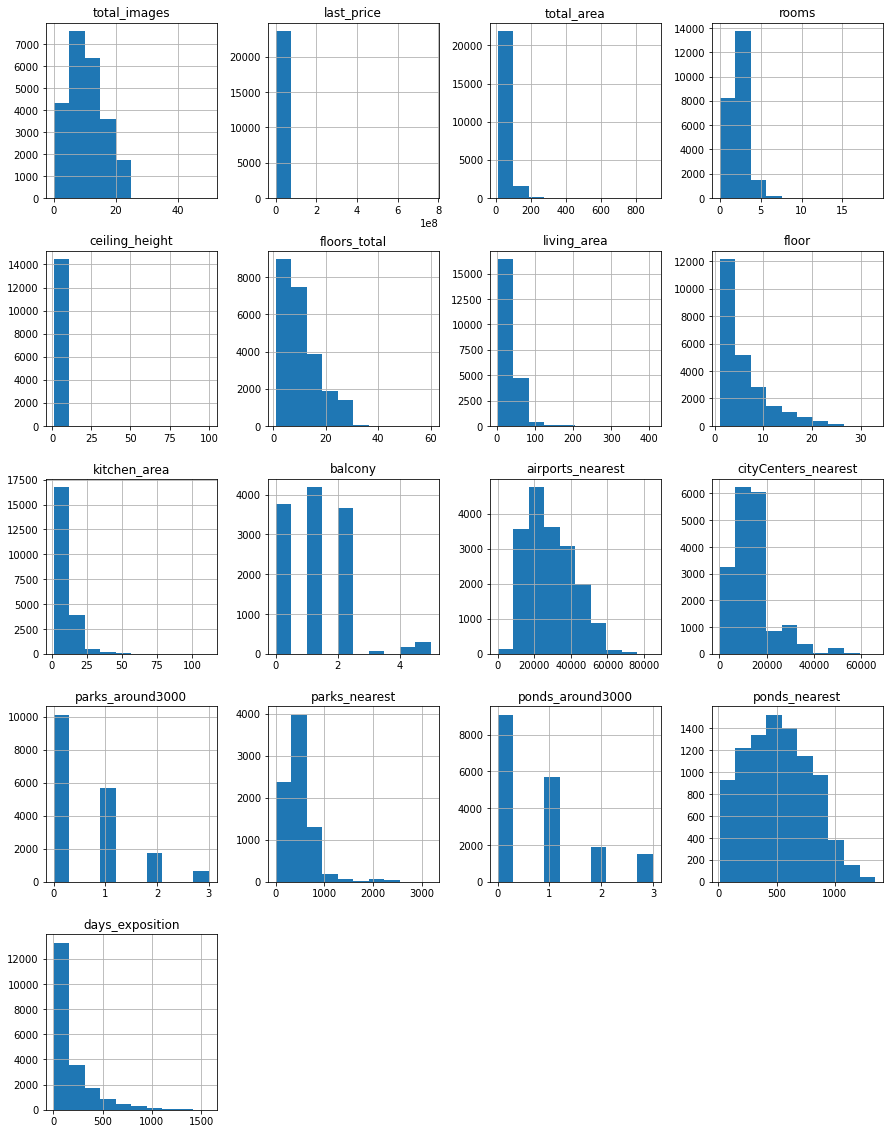

In [4]:
data.hist(figsize=(15, 20));

В открытом нами датасете 22 столбца и большое количество данных. В данных встречаются пропуски, которые мы в дальейшем будем заполнять. 
Некоторые из столбцов будут не информативными для нас, это понятно сразу. Например, столбец с количеством фотографий.
Тип данных нужно будет тоже привести к верному. Изменить float на int. Необходимо будет привести даты размещения к временному типу данных Datetime. Высчитать жилые площади и площади кухонь на основе замеченных закономерностей. заполнить пропущенные значения в полях "апартаменты" и "балкон". Переписать цены квартир в тысячах рублей. Квартирам-студям назначить число комнат 0. удалить аномальные значения и выбросы, которые будут мешать анализу.

В общем, предстоит большая работа по предобработке данных, на основании которых мы и будет делать рассчеты и дальнейшие выводы.


### Предобработка данных

In [5]:
data.isnull().sum()
#вывели для ознакомления сумму пропусков в каждом из столбцов исходной таблицы

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
data.select_dtypes(['float', 'int']).corr()
#создали таблицу корреляции, чтобы посмотреть зависимость

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.00,0.10,0.12,0.10,-0.00,0.01,0.10,0.03,0.10,0.12,-0.00,-0.05,0.02,-0.01,-0.01,-0.00,-0.03
last_price,0.10,1.00,0.65,0.36,0.09,-0.01,0.57,0.03,0.52,0.03,-0.03,-0.21,0.15,-0.02,0.16,-0.08,0.08
total_area,0.12,0.65,1.00,0.76,0.10,-0.08,0.94,-0.02,0.61,0.05,-0.03,-0.23,0.16,-0.02,0.16,-0.10,0.15
rooms,0.10,0.36,0.76,1.00,0.05,-0.23,0.85,-0.15,0.27,0.02,-0.06,-0.18,0.14,-0.05,0.09,-0.06,0.13
ceiling_height,-0.00,0.09,0.10,0.05,1.00,-0.03,0.09,-0.01,0.09,0.04,-0.02,-0.09,0.07,-0.02,0.08,-0.06,0.02
floors_total,0.01,-0.01,-0.08,-0.23,-0.03,1.00,-0.17,0.68,0.16,0.19,0.11,0.02,-0.25,0.10,-0.12,0.04,-0.05
living_area,0.10,0.57,0.94,0.85,0.09,-0.17,1.00,-0.10,0.43,0.02,-0.06,-0.23,0.18,-0.05,0.15,-0.08,0.14
floor,0.03,0.03,-0.02,-0.15,-0.01,0.68,-0.10,1.00,0.14,0.17,0.07,0.01,-0.16,0.07,-0.08,0.02,-0.04
kitchen_area,0.10,0.52,0.61,0.27,0.09,0.16,0.43,0.14,1.00,0.10,0.01,-0.19,0.09,0.03,0.15,-0.11,0.10
balcony,0.12,0.03,0.05,0.02,0.04,0.19,0.02,0.17,0.10,1.00,0.07,0.05,-0.08,0.05,-0.03,0.01,-0.03


In [7]:
data['balcony'] = data['balcony'].fillna(0)
#заменили пропущенные значения в столбце "балконы", если балконов нет, то их и не отметили ни одного

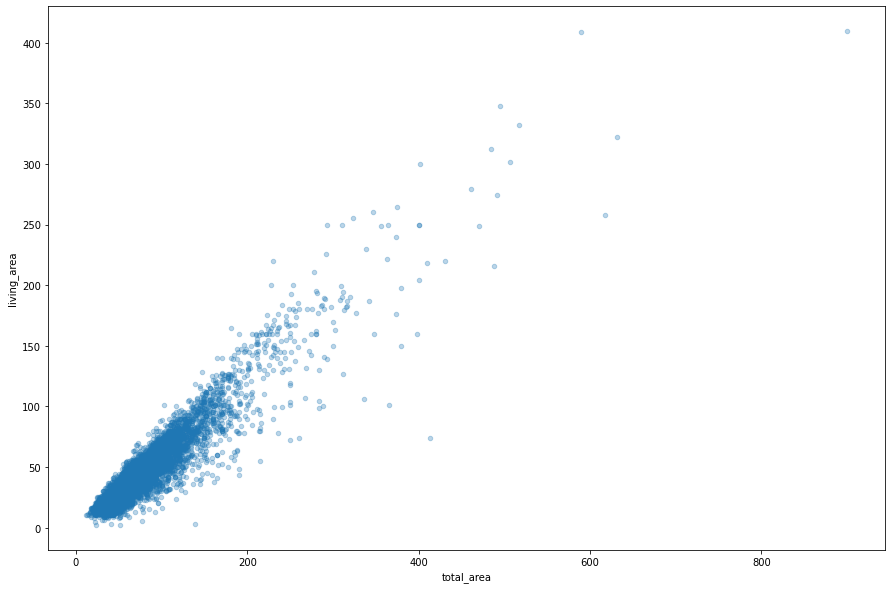

In [8]:
data.plot.scatter(x='total_area', y='living_area', figsize=(15,10), alpha=0.3);
#на графике видим зависимость между жилой площадью и обей площадью

In [9]:
data['living_rate'] = data['living_area'] / data['total_area']
data['kitchen_rate'] = data['kitchen_area'] / data['total_area']
rates = data.pivot_table(index='rooms', values=['living_rate', 'kitchen_rate'], aggfunc='median').median()

data.loc[(data['living_area'].isna()) | (data['kitchen_area'].isna()) | ((data['kitchen_area'] + data['living_area']) > data['total_area'] * 0.9), ['living_area', 'kitchen_area']] =\
    pd.DataFrame({'living_area': data['total_area'] * rates['living_rate'], 'kitchen_area': data['total_area'] * rates['kitchen_rate']})
#заменили пропущенные значения в столбце "жилая площадь в квадратных метрах (м²)", создав временный столбец из которого в последствии нам понадобятся значения

In [10]:
data.pop('living_rate')
#удалили ненужный, созданный нами для вычислений столбец

0       0.47
1       0.46
2       0.61
3        NaN
4       0.32
        ... 
23694   0.55
23695   0.64
23696   0.52
23697    NaN
23698   0.38
Name: living_rate, Length: 23699, dtype: float64

In [11]:
data.pop('kitchen_rate')
#удалили ненужный, созданный нами для вычислений столбец

0       0.23
1       0.27
2       0.15
3        NaN
4       0.41
        ... 
23694   0.10
23695   0.14
23696    NaN
23697   0.30
23698   0.28
Name: kitchen_rate, Length: 23699, dtype: float64

In [12]:
for room in data['rooms'].unique():
    ratio = data.loc[(data['rooms'] == room), 'living_area'] / data.loc[(data['rooms'] == room), 'total_area']
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] = \
        (data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'total_area']) * ratio.quantile(.50)
#заменили пропущенные значения в столбце "число комнат"

In [13]:
 data.rooms.describe() #

count   23699.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

In [14]:
data = data[data['rooms']<8]

In [15]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 
#заменили пропущенные значение в столбце "высота потолков" на медианные

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(False)
#заменили пропущенные значение в столбце "апартаменты" на False (булев тип), ведь если это были бы апартаменты в объявлении, это бы обязательно выделили. Вероятнее всего, пользователи пропускали эту графу за ненадобностью

In [17]:
data = data.dropna(subset = ['floors_total','locality_name'])
#удалили строки с пропущенными значениями в столбце "этаж" и "название населённого пункта". Так как разумно заполнить пропуски мы не можем и эти строки составляют совсем небольшой процент из исходной таблицы

In [18]:
data = data.rename(columns ={'cityCenters_nearest': 'city_centers_nearest'})
#приводим название столбца к змеиному написанию для удобства и красоты

In [19]:
data.loc[(data['ponds_around3000'].isna()) & (data['ponds_nearest'].isna()), 'ponds_around3000'] = 0
#заменили значение в столбце "число водоёмов в радиусе 3 км" на 0


In [20]:
data.loc[(data['parks_around3000'].isna()) & (data['parks_nearest'].isna()), 'parks_around3000'] = 0

In [21]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15530
ponds_around3000            0
ponds_nearest           14515
days_exposition          3164
dtype: int64

Вывод: причинами появления пропусков, могут служить необязательные поля ввода (пользователи указали лишь основную необходимую информацию, в том числе ту, которая сможет сделать квартиру более "желанной" и поднять стоимость квадратного метра). В столбцах с жилой и кухонной площадью,  мы можем предположить, что для продавца, поля жилая и кухонная площадь не являются обязательными к заполнению, от чего там иногда могут попадаться либо пропуски, либо некорректные значения. А вот в столбцe с информацией об общей площади недвижимости, в данном столбце нет пропусков, можно предположить, что данное поле обязательно для заполнения продавцом недвижимости и, вероятнее всего, это точная цифра, т.к. и покупатели часто ориентируются на общую площадь.

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format ='%Y-%m-%dT%H:%M:%S')
#изменили на верный тип данных даты и времени
data['first_day_exposition'] = data['first_day_exposition'].round('1d') #отбросили время, оставив только дату
data = data.rename(columns={'first_day_exposition' : 'date'}) # переименуем столбец для краткости

In [23]:
data['last_price'] = data['last_price'].astype('int')
#изменили тип данных на "целое число"

In [24]:
data['balcony'] = data['balcony'].astype('int')
#изменили тип данных на "целое число"

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23534 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23534 non-null  int64         
 1   last_price            23534 non-null  int64         
 2   total_area            23534 non-null  float64       
 3   date                  23534 non-null  datetime64[ns]
 4   rooms                 23534 non-null  int64         
 5   ceiling_height        23534 non-null  float64       
 6   floors_total          23534 non-null  float64       
 7   living_area           23534 non-null  float64       
 8   floor                 23534 non-null  int64         
 9   is_apartment          23534 non-null  bool          
 10  studio                23534 non-null  bool          
 11  open_plan             23534 non-null  bool          
 12  kitchen_area          23534 non-null  float64       
 13  balcony         

In [26]:
data.duplicated().sum()
#явных дубликатов в таблице нет

0

Изменены типы данных некоторых столбцов: столбец "irst_day_exposition" изменен на правильный тип даты и времени. Столбцы "last price", "balcony" изменены на тип "целое число", так как "число с плавающей точкой" здесь объективно не нужно, просто отбросился лишний ноль после точки.

In [27]:
data['locality_name'].unique()
#смотрим уникальные значения в столбце locality_name

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [28]:
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е')
#привели названия к нижнему регистру и заменили "ё" на букву "е"

In [29]:
def local_type(local):
    if pd.isna(local):
        return 'unknown'
    if 'посел' in local:
        return 'поселок'
    if 'санк' in local:
        return 'город'
    if ['городск', 'коттедж', 'котедж']:
        return 'ПГТ'
    else:
        return 'тип не определен'
#отсортировала по типу населенного пункта

In [30]:
data['local_type'] = data['locality_name'].apply(local_type)
#добавили в таблицу новый столбец с типом населенного пункта

In [31]:
data.head(10)

,total_images,last_price,total_area,date,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,local_type
0,20,13000000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,город
1,7,3350000,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,поселок шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,поселок
2,10,5196000,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,город
3,0,64900000,159.00,2015-07-24,3,2.65,14.00,104.90,9,False,False,False,16.29,0,санкт-петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,город
4,2,10000000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,город
5,10,2890000,30.40,2018-09-10,1,2.65,12.00,14.40,5,False,False,False,9.10,0,городской поселок янино-1,NaN,NaN,0.00,NaN,0.00,NaN,55.00,поселок
6,6,3700000,37.30,2017-11-02,1,2.65,26.00,10.60,6,False,False,False,14.40,1,поселок парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00,поселок
7,5,7915000,71.60,2019-04-18,2,2.65,24.00,47.24,22,False,False,False,7.34,2,санкт-петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN,город
8,20,2900000,33.16,2018-05-23,1,2.65,27.00,15.43,26,False,False,False,8.81,0,поселок мурино,NaN,NaN,0.00,NaN,0.00,NaN,189.00,поселок
9,18,5400000,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,False,False,6.50,2,санкт-петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00,город


In [32]:
len(data['locality_name'].unique())

330

In [33]:
data['local_type'].value_counts()

город      15621
ПГТ         5263
поселок     2650
Name: local_type, dtype: int64

In [34]:
data = data.loc[(data['last_price']>400000) & (data['last_price']<100000000)] # убрала аномальные значения в цене. Отбросив слишком маленькие и слишком большие значения
data.reset_index(inplace=True, drop=True)
print(data.index)
print(data['last_price'].describe())

RangeIndex(start=0, stop=23499, step=1)
count      23499.00
mean     6219717.95
std      6351644.97
min       430000.00
25%      3400000.00
50%      4600000.00
75%      6750000.00
max     99000000.00
Name: last_price, dtype: float64


In [35]:
print(f'{len(data.query("last_price % 1000 != 0")) / len(data) :.0%}') # сколько квартир имеют цену с рублями на конце# сколько квартир имеют цену с рублями на конце#сколько квартир имеют цену с рублями на конце 

3%


In [36]:
data['last_price'] = data['last_price'] / 1000
#отбросили три нуля
data = data.rename(columns={'last_price' : 'price_1000'})
#переименовали столбец, чтобы не забыть, что цены в тысячах

In [37]:
data['price_1000'] = data['price_1000'].astype('int')
#изменили тип цены

In [38]:
data[(data['ceiling_height'] == 100) | (data['ceiling_height'] == 10.3)]
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] /= 10
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 

In [39]:
data['ceiling_height'].quantile(0.999)
#проверяем что получилось

4.4

In [40]:
sorted(data.ceiling_height.values)[-10:]

[5.2, 5.3, 5.5, 5.6, 5.8, 8.0, 8.0, 8.0, 8.3, 10.0]

In [41]:
data[data['ceiling_height']>7]

,total_images,price_1000,total_area,date,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,local_type
3447,3,1400,30.00,2018-03-16,1,8.00,5.00,15.30,2,False,False,False,7.30,0,деревня нурма,NaN,NaN,0.00,NaN,0.00,NaN,125.00,ПГТ
5817,20,5650,45.00,2018-08-15,1,8.30,16.00,19.30,14,False,False,False,8.30,1,санкт-петербург,13069.00,10763.00,0.00,NaN,1.00,613.00,14.00,город
15614,14,5600,67.00,2016-11-11,3,8.00,16.00,41.00,1,False,False,False,8.00,0,санкт-петербург,32691.00,11035.00,1.00,723.00,0.00,NaN,474.00,город
17298,0,5350,54.00,2015-06-16,2,8.00,5.00,35.63,2,False,False,False,5.53,1,красное село,24638.00,28062.00,0.00,NaN,0.00,NaN,469.00,ПГТ
22673,0,15000,25.00,2018-07-25,1,10.00,5.00,16.49,5,True,False,False,2.56,5,санкт-петербург,34963.00,8283.00,1.00,223.00,3.00,30.00,19.00,город


In [42]:
data = data[data['ceiling_height']<5.2]

In [43]:
# Удаляем строку где 371 кв.м
print("Кол-во строк перед удалением", data.shape, len(data))
data.drop(data.loc[(data['rooms']==0) & (data['total_area']==371)].index,inplace=True, axis=0)
print("Кол-во строк после удаления", data.shape, len(data))

Кол-во строк перед удалением (23489, 23) 23489
Кол-во строк после удаления (23488, 23) 23488


In [44]:
data.head()

,total_images,price_1000,total_area,date,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,local_type
0,20,13000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,санкт-петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,город
1,7,3350,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,поселок шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,поселок
2,10,5196,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0,санкт-петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,город
3,0,64900,159.00,2015-07-24,3,2.65,14.00,104.90,9,False,False,False,16.29,0,санкт-петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,город
4,2,10000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,санкт-петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,город


Выводы:
В процессе предобработки данных пропуски значений были заполнены в зависимости от ситуации:
    - медианой по группам значений либо общей медианой по всем значениям,
    - там, где логически это возможно – конкретными значениями ( например False, 0).

В случаях , когда заполнение невозможно, строки были удалены.
Значения столбца locality_name категоризированы по наименованиям населенных пунктов (различные стили написания систематизированы и приведены в единообразию).

Аномельные и неправдоподобные значения и выбросы в столбцах высота потолков, стоимость квартиры, количество комнаст и общаая площаль были удалены. Они составляли небольшой процент от общего датафрейма. Таким образом, данные стали "чище" и можно провести наиболее правдоподобные рассчеты и анализы в последующих пунктах проекта.

Пропуски в автоматически собранных данных могли появиться вследствие неполной или некорректной информации от пользователя, например, адресе квартиры. Пропуски и ошибки в информации, переданной непосредственно пользователями - вероятно, опечатки или легкомысленное отношение. Возможно, следует доработать форму подачи объявлений и дополнить ее контролем вводимых данных.


### Посчитайте и добавьте в таблицу новые столбцы

In [45]:
data['price_sq_m_1000'] = data['price_1000'] / data['total_area'] 
#находим стоимость квадратного метра (в тысячая рублей), добавляем столбец

In [46]:
data['day_exposition'] = data['date'].dt.weekday+1 # считать понедельник нулевым непривычно, добавим +1
data['month_exposition'] = pd.DatetimeIndex(data['date']).month
data['year_exposition'] = pd.DatetimeIndex(data['date']).year
#добавили столбцы день, месяц, год публикации объявления

In [47]:
data['floor_type'] = 'другой'
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
#группируем по этажам, добавляем новый столбец в таблицу

In [48]:
data['living_area_ratio'] = data['living_area'] / data['total_area']
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23488 entries, 0 to 23498
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23488 non-null  int64         
 1   price_1000            23488 non-null  int64         
 2   total_area            23488 non-null  float64       
 3   date                  23488 non-null  datetime64[ns]
 4   rooms                 23488 non-null  int64         
 5   ceiling_height        23488 non-null  float64       
 6   floors_total          23488 non-null  float64       
 7   living_area           23488 non-null  float64       
 8   floor                 23488 non-null  int64         
 9   is_apartment          23488 non-null  bool          
 10  studio                23488 non-null  bool          
 11  open_plan             23488 non-null  bool          
 12  kitchen_area          23488 non-null  float64       
 13  balcony         

In [50]:
data['city_centers_nearest'].head(20)

0    16028.00
1    18603.00
2    13933.00
3     6800.00
4     8098.00
5         NaN
6    19143.00
7    11634.00
8         NaN
9    15008.00
10   13878.00
11   51677.00
12        NaN
13   33058.00
14   30759.00
15   14259.00
16   10698.00
17   14616.00
18   10842.00
19   12843.00
Name: city_centers_nearest, dtype: float64

In [51]:
data['city_centers_nearest_km'] = data['city_centers_nearest']/1000

In [52]:
data['city_centers_nearest_km'].round()

0       16.00
1       19.00
2       14.00
3        7.00
4        8.00
         ... 
23494    4.00
23495     NaN
23496     NaN
23497   10.00
23498     NaN
Name: city_centers_nearest_km, Length: 23488, dtype: float64

In [53]:
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round(0)

In [54]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [55]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [56]:
data.head(20)

,total_images,price_1000,total_area,date,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,local_type,price_sq_m_1000,day_exposition,month_exposition,year_exposition,floor_type,living_area_ratio,kitchen_area_ratio,city_centers_nearest_km
0,20,13000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,False,False,25.00,0,санкт-петербург,...,16028.00,1,482.00,2,755.00,NaN,город,120.37,4,3,2019,другой,0.47,0.23,16.00
1,7,3350,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,False,False,11.00,2,поселок шушары,...,18603.00,0,NaN,0,NaN,81.00,поселок,82.92,2,12,2018,первый,0.46,0.27,19.00
2,10,5196,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,False,False,8.30,0,санкт-петербург,...,13933.00,1,90.00,2,574.00,558.00,город,92.79,4,8,2015,другой,0.61,0.15,14.00
3,0,64900,159.00,2015-07-24,3,2.65,14.00,104.90,9,False,False,False,16.29,0,санкт-петербург,...,6800.00,2,84.00,3,234.00,424.00,город,408.18,5,7,2015,другой,0.66,0.10,7.00
4,2,10000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,False,False,41.00,0,санкт-петербург,...,8098.00,2,112.00,1,48.00,121.00,город,100.00,2,6,2018,другой,0.32,0.41,8.00
5,10,2890,30.40,2018-09-10,1,2.65,12.00,14.40,5,False,False,False,9.10,0,городской поселок янино-1,...,NaN,0,NaN,0,NaN,55.00,поселок,95.07,1,9,2018,другой,0.47,0.30,NaN
6,6,3700,37.30,2017-11-02,1,2.65,26.00,10.60,6,False,False,False,14.40,1,поселок парголово,...,19143.00,0,NaN,0,NaN,155.00,поселок,99.20,4,11,2017,другой,0.28,0.39,19.00
7,5,7915,71.60,2019-04-18,2,2.65,24.00,47.24,22,False,False,False,7.34,2,санкт-петербург,...,11634.00,0,NaN,0,NaN,NaN,город,110.54,4,4,2019,другой,0.66,0.10,12.00
8,20,2900,33.16,2018-05-23,1,2.65,27.00,15.43,26,False,False,False,8.81,0,поселок мурино,...,NaN,0,NaN,0,NaN,189.00,поселок,87.45,3,5,2018,другой,0.47,0.27,NaN
9,18,5400,61.00,2017-02-26,3,2.50,9.00,43.60,7,False,False,False,6.50,2,санкт-петербург,...,15008.00,0,NaN,0,NaN,289.00,город,88.52,7,2,2017,другой,0.71,0.11,15.00


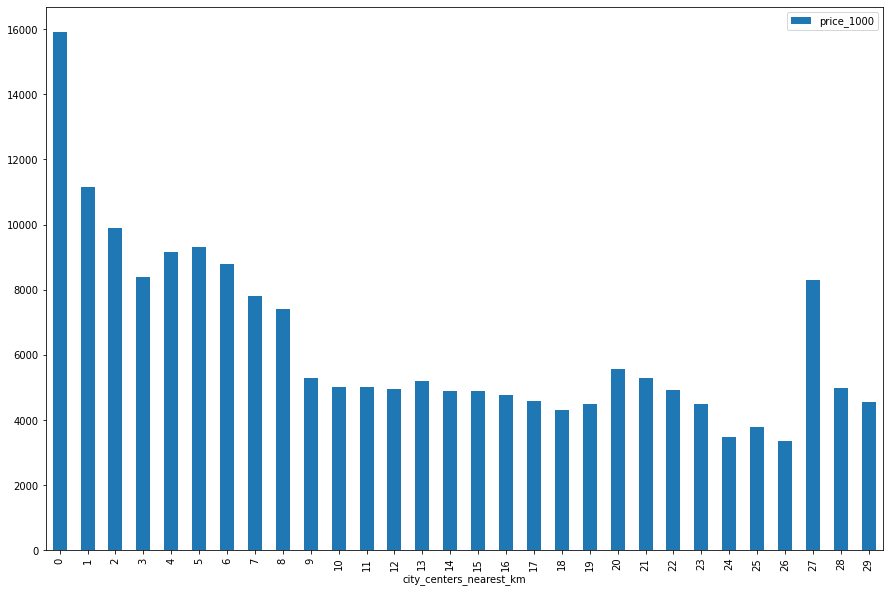

In [57]:
flat_spb = data.query('locality_name == "санкт-петербург"') #выбираем только квартиры в спб
flat_spb = flat_spb.dropna(subset = ['city_centers_nearest_km'], inplace = False) #убираем пропуски для дальнейшей работы
flat_spb['city_centers_nearest_km'] = flat_spb['city_centers_nearest_km'].round() #округялем
flat_spb = flat_spb.dropna(subset=['city_centers_nearest_km'])
flat_spb['city_centers_nearest_km'] = flat_spb['city_centers_nearest_km'].astype(int)
flat_spb.pivot_table(index='city_centers_nearest_km', values='price_1000', aggfunc='median')\
    .plot(kind='bar', figsize=(15,10));

Вывод: Новые параметры посчитаны на основе имевшихся ранее данных и помогут детальнее рассмотреть информацию об объектах. Например, выяснить, что за квартира такая со стоимостью квадратного метра почти 2 млн рублей. 

### Проведите исследовательский анализ данных

#### Изучение параметров объектов

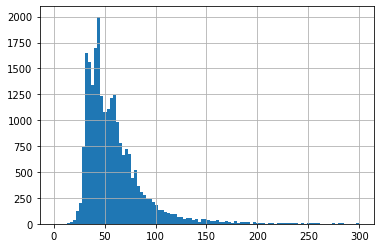

In [58]:
data['total_area'].hist(bins=100, range=(1, 300))
plt.show()
#площадь (гистограмма)

На графике можем заметить, что больше всего квартир с площадью 30-45 кв.м. Вероятнее всего это однокомнатные и двухкомнастные квартиры. Следом за ними идут квартиры площадью примерно до 75 кв.м. Это двух- и трехкомнатные квартиры. Чем больше площадь квартиры -  тем их меньше (более 75 кв.м) Квартиры с меньшей квадратурой (до 30 кв.м) встречаются редко.  

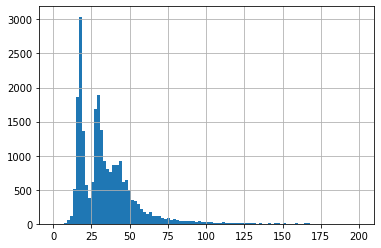

In [59]:
data['living_area'].hist(bins=100, range=(1, 200))
plt.show()
#жилая площадь (гистограмма)

Квартиры с жилой площадью 18 кв.м встречаются заметно чаще других, вероятнеее всего это студии. Следом на ними по пупулярности квартиры, жилая площадь которых около 32-35 кв.м. Квартиры с большой жилой площадью встречаются значительно реже других.

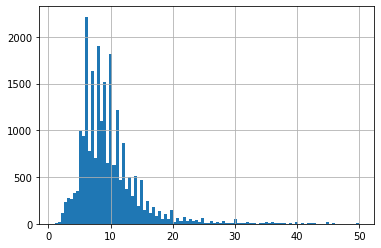

In [60]:
data['kitchen_area'].hist(bins=100, range=(1, 50))
plt.show()
#площадь кухни(гистограмма)

На графике можем заметить, что 7 кв.м. наиболее часто встречающееся значение площади кухни. Кухня небольшая и вероятнее всего располагается в 1 или 2 комнатной квартире в старом жилом фонде. В целом квартиры с площадью кухни до 10 кв. м встречаются гораздо чаще других. Чем больше площадь кухни, тем реже такие квартиры встречаются в объявлениях.

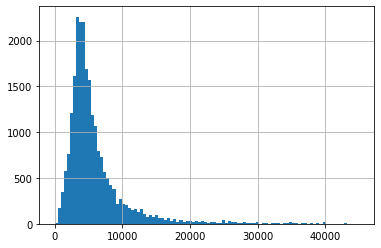

In [61]:
data['price_1000'].hist(bins=100, range=(1, 45000))
plt.show()
#цена в тысячах (гистограмма)

Больше всего квартир продаются по цене в интервале от 1,8 до 7,5 млн.руб. Далее: цена растет - количество объектов уменьшается.

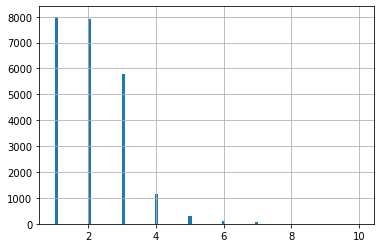

In [62]:
data['rooms'].hist(bins=100, range=(1, 10))
plt.show()
#количество комнат(гистограмма)

Самые популярные квартиры это однокомнатные и двухкомнатные. Трехкомнатных квартир мы видим на порядок меньше. Далее можем заметить, что чем больше комнат в квартире, тем реже встречаются такие объекты.

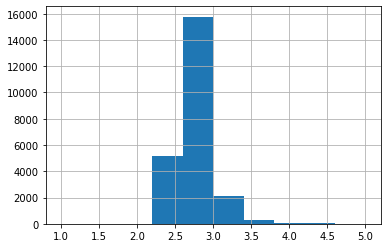

In [63]:
data['ceiling_height'].hist(bins=10, range=(1, 5))
plt.show()
#выота потолка(гистограмма)

Высота потолков в квартирах чаще всего стандартная 2.7м. Редко встречаются квартиры с очень высокими потолками. Высота потолков до 2.7м может быть связана с типом строительных материалов, выбранных собственником для отделки и ремонта(каркасные потолки, подвесные и т.п)

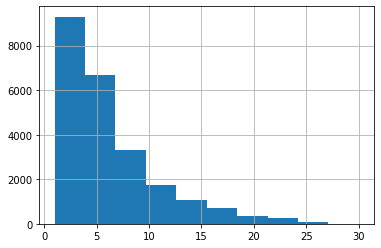

In [64]:
data['floor'].hist(bins=10, range=(1, 30))
plt.show()
#этаж (гистограмма)

На графике отображена обратная зависимость. Чем ниже этаж, тем больше квартир продается. Квартиры на 1-3 этаже встречаются чаще других.

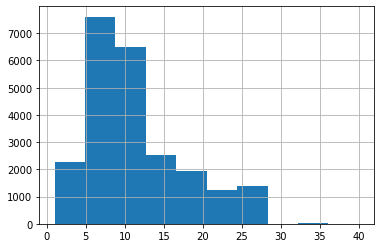

In [65]:
data['floors_total'].hist(bins=10, range=(1, 40))
plt.show()
#этажность дома(гистограмма)

Гляда на график, мы можем заметить, что наиболее часто продаются квартиры в домах 5-8 этажей. Квартиры в пятиэтажках это вероятнее всего старый жилой фонд. 

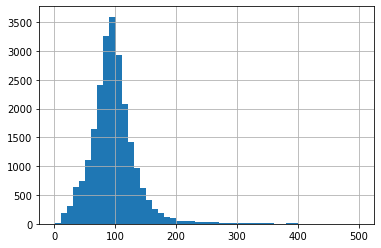

In [66]:
data['price_sq_m_1000'].hist(bins=50, range=(1, 500))
plt.show()
# цена 1 м2 (гистограама)

Стоимость квадратного метрадостаточно рознится. Большинство квартир имеют цену около 100 тысяч рублей за 1 кв.м.От этой цены и в большую, и в менью сторону сдвига стоимость, идет разпределение количества квартир похожее на башню, то есть уменьшение.

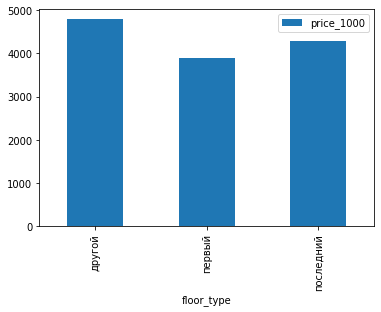

In [67]:
def cat_floor(row):
    floor = row['floor']
    total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == total:
        return 'последний'
    return 'другой'
data['floor_catogory'] = data.apply(cat_floor, axis=1)
data.groupby('floor_type').agg({'price_1000':'median'}).reset_index().plot(kind='bar', x='floor_type', y='price_1000')
plt.show()

Больше всего квартир продаются на средних этажах, это и логично, ведь если квартира находится не на последнем и не на первом этаже, то она попадает в категорию "средний". Следущие по количеству это квартиры на последних этажах. И замыкают первые этажи, что прекрасно видно на гистограмме.

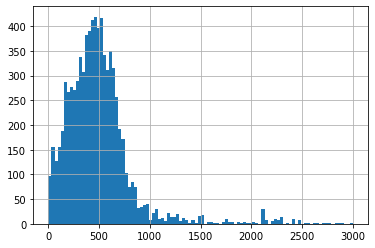

In [68]:
data['parks_nearest'].hist(bins=100, range=(1, 3000))
plt.show()
# парки в округе(гисторамма)

Большая часть квартир расположены неподалеку от парков. Зеленая территория, чистый воздух, место для прогулок с детьми и рекриации это всегда здорово. Преимущественно расстояние до парка составляет 500м.

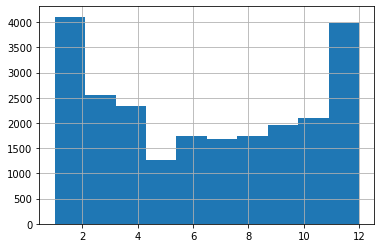

In [69]:
data['month_exposition'].hist(bins=10, range=(1, 12))
#data['day_exposition'].hist(bins=10, range=(1, 7))
plt.show()
#гистограмма по месяцу объявления 

Как мы видим на графике, пик продажи квартир - зима. В январе и декабре люди продавали квартиры на продажу чаще. Это может быть связано с желанием начать новую жизнь с нового года.  

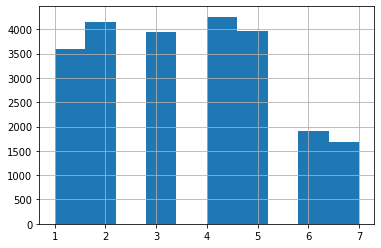

In [70]:
data['day_exposition'].hist(bins=10, range=(1, 7))
plt.show()
#гистограмма по дню объявления

В выходные дни квартиры выставляют реже, чем в будни. Если квартиру выставляет на продажу не собственник, а агент по недвижимости, то тогда все объясняется рабочим временем. В связи с эти в субботу и воскресенье меньше всего квартир были выставлены на продажу.

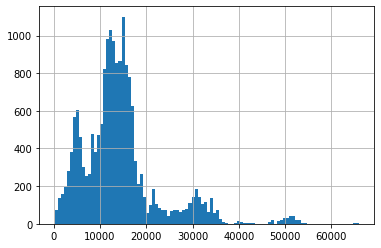

In [71]:
data['city_centers_nearest'].hist(bins=100)
plt.show()
#гистограмма расстояние до центра города в метрах

Большая часть квартир выставленных на продажу находится на удалении 11-15 км от центра города. 

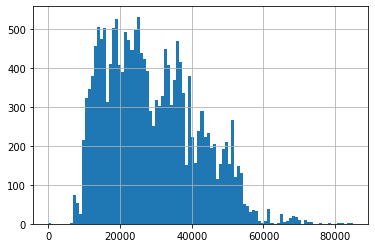

In [72]:
data['airports_nearest'].hist(bins=100)
plt.show()
#гистограмма расстояние до аэропорта в метрах

Расстояние до ближайшего аэропорта на гистограмме мы можем увидеть несколькими пиками, вероятнее всего это распределение по районам. Большая часть квартир находится более чем в 20 км от аэропорта. И преимущественное большинство квартир не превышает 40 км расстояния до аэропорта.

#### Изучение days_exposition

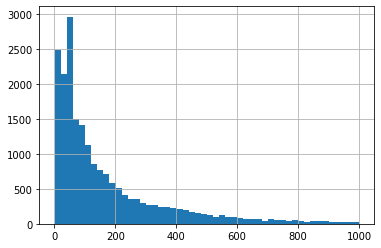

In [73]:
#data['days_exposition'].hist(bins=50, range=(1, 100))
data['days_exposition'].hist(bins=50, range=(1, 1000))
plt.show()
#гистограмма по количеству дней за которые продали квартиру

In [74]:
data['days_exposition'].median()

95.0

In [75]:
data['days_exposition'].mean()

180.25386128873586

Среднее число продажи квартиры гороворит нам о том, что квартира продается за 181 дней, это примерно полгода. Медиана же смещена в  меньшую сторону, связано это с тем, что есть квартиры которые продаются слишком долго, например, очень дорогая квартира, которая ждет своего состоятельного счастливого обладателя. Такие кобъекты недвижимости могут продаваться годами, поэтому мы будем считать это долгой продажей. Или это может быть квартира с некоторыми негативными особенностями (вид из окна на свалку или кладбище, район с плохо  развитой инфраструктурой и т.п.). Внезапные пики возникают на 45 и 60 днях. Возможно, это вызвано особенностями платформы размещения объявлений и их автоматическим снятием с продажи после указанных сроков.Ознакомившись с графиком, мы можем заметить, что большинство квартир продаются в течении трех месяцев, это примерно 90 дней. Такие продажи можно считать быстрыми.


#### Факторы влияющие на полную стоимость объекта

Корелляция стоимости от total_area 0.7641047752324599


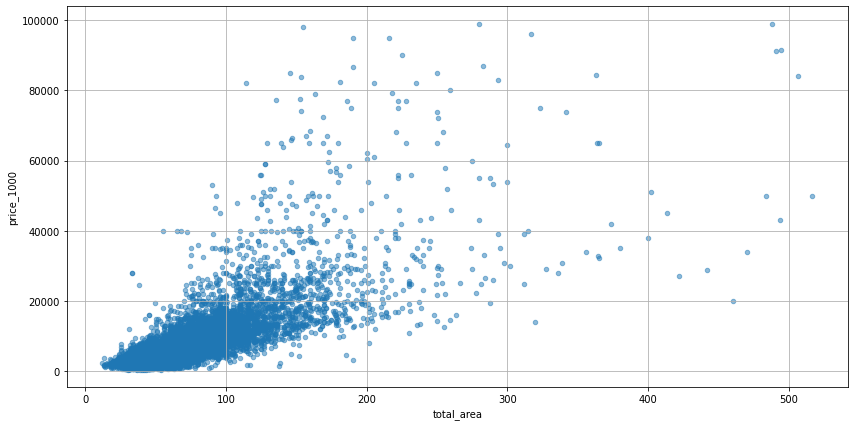

In [76]:
def cor(column):
    print('Корелляция стоимости от',column , data['price_1000'].corr(data[column]))
    data.plot(x=column, y='price_1000', kind='scatter', grid=True, figsize=(14,7), alpha=0.5); 
    #создаем единажды функцию, чтобы в дальнейшем применять ее к разным столбцам для вычисления корреляции

cor('total_area')

На графике видим, что цена возрастает от увеличения площади.

Корелляция стоимости от living_area 0.6876723387769486


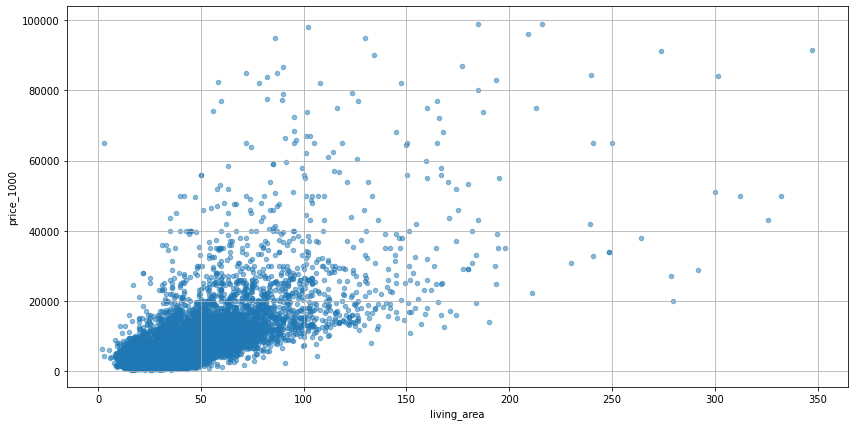

In [77]:
cor('living_area')

Корреляция есть, но выражена не очень сильно. Стоимость квартиры скорее зависит от общей площади, что нам и удалось увидеть на предыдущем графике.

Корелляция стоимости от kitchen_area 0.5719909811945713


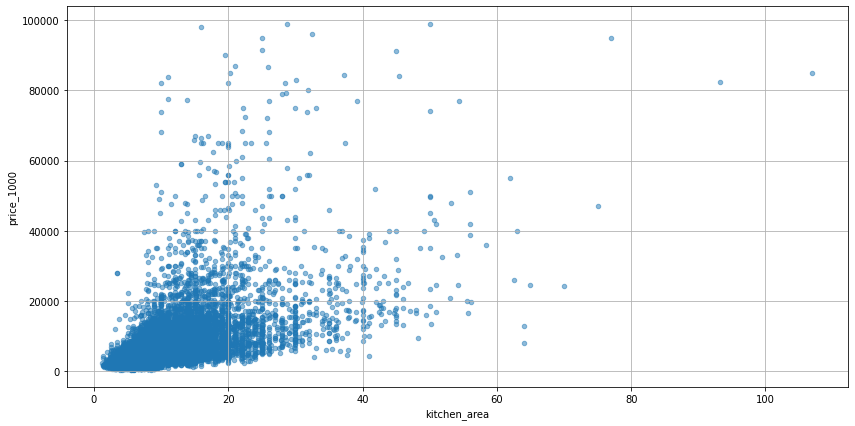

In [78]:
cor('kitchen_area')

В этом рассчете, корреляция слабее, нежели в сравнении с общей и жилой площадью. Зависимость наблюдается, но не внушительная.

Корелляция стоимости от rooms 0.4623143192779143


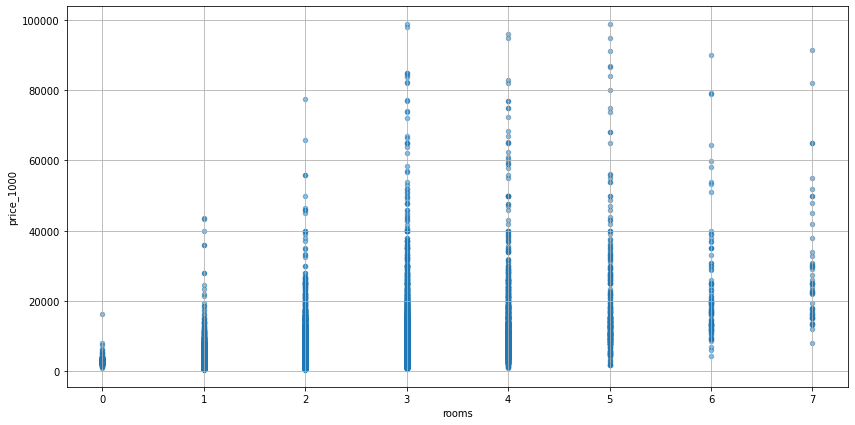

In [79]:
cor('rooms')

Здесь мы можем заметить зависимость цены от кол-ва комнат слабо прослеживается. Она увеличивается, при возрастании комнат от 1 до 3. Очень много квартир от 1 до 6 комнат в диапазоне до 30 млн - это показывает что зависимость всетаки довольно слаба и уже в квартирах от 3 комнат уже отсутствует

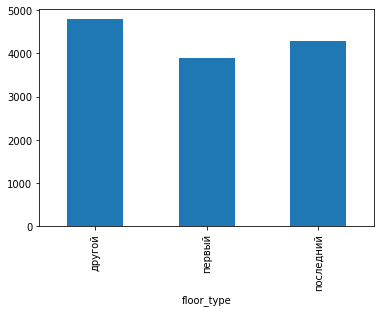

In [80]:
data.groupby('floor_type')['price_1000'].median().plot.bar()
plt.show()

Между стоимостью квартиры и этажем прослеживается корреляция. 
Первый этаж мало кто любит и цена его существенно отличается от остальных; люди предпочитают не первый и не последний этаж - его цена выше(но на немного выше последнего).
Квартиры на средних этажах стоят дороже, что и видим мы на графике.

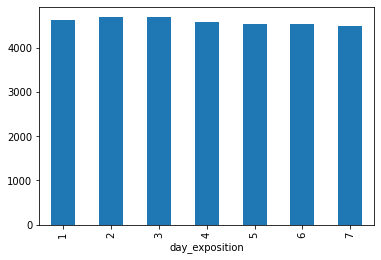

In [81]:
data.groupby('day_exposition')['price_1000'].median().plot.bar()
plt.show()

Зависимость от дня, когда было выложено объявление и стоимости квартиры особо не прослеживается. Это прекрасно видно на графике.

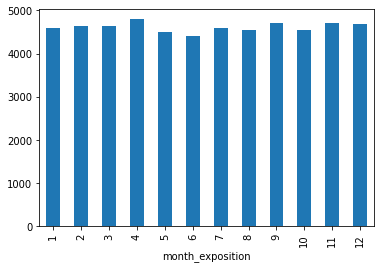

In [82]:
data.groupby('month_exposition')['price_1000'].median().plot.bar()
plt.show()

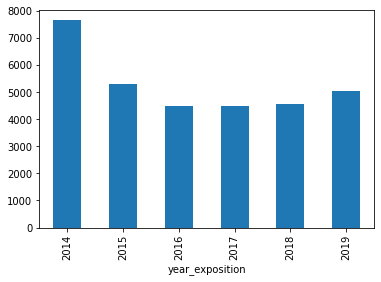

In [83]:
data.groupby('year_exposition')['price_1000'].median().plot.bar()
plt.show()

А вот здесь как раз таки видна зависимость от года и стоимости квартиры. Интересные события мы можем заметить. Квартиры в 2014 году стоили дороже, чем во все последующие годы до 2019 ода включительно. Возможно, падение цен на недвижимость с 2014 по 2016 годы было связано с экономическим кризисом.После 2016 года, каждй год квартиры немного прибавляют в цене, но до отметки 2014 года еще не дошли, как мы можем заметить. Это очень интересная особенность, которую мы выявили.

#### Cредняя цена 1 м2 в 10 населённых пунктах с наибольшим числом объявлений

In [84]:
data['locality_name'].value_counts().head(10)
#выбрали 10 населенных пунктов с самым большим числом объявлений

санкт-петербург      15577
поселок мурино         552
поселок шушары         439
всеволожск             398
пушкин                 369
колпино                337
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

In [85]:
flat_10 = data.pivot_table(index = 'locality_name', values = 'price_sq_m_1000', aggfunc=['count', 'mean'])
flat_10.columns = ['flats', 'price_sq_m_1000']
flat_10 = flat_10.sort_values(by='flats', ascending=False).head(10)
print(flat_10)

                   flats  price_sq_m_1000
locality_name                            
санкт-петербург    15577           113.58
поселок мурино       552            85.63
поселок шушары       439            78.55
всеволожск           398            68.65
пушкин               369           103.13
колпино              337            75.33
поселок парголово    327            90.18
гатчина              307            68.75
деревня кудрово      299            92.47
выборг               237            58.14


In [86]:
print('Населенный пункт с самой низкой стоимостью жилья', flat_10.loc[flat_10['price_sq_m_1000']==flat_10['price_sq_m_1000'].min()])


Населенный пункт с самой низкой стоимостью жилья                flats  price_sq_m_1000
locality_name                        
выборг           237            58.14


In [87]:
print('Населенный пункт с самой высокой стоимостью жилья', flat_10.loc[flat_10['price_sq_m_1000']==flat_10['price_sq_m_1000'].max()])


Населенный пункт с самой высокой стоимостью жилья                  flats  price_sq_m_1000
locality_name                          
санкт-петербург  15577           113.58


#### Средняя цена километра в Санкт-Петербурге

In [88]:
spb = data.loc[data['locality_name']=='санкт-петербург',['locality_name','price_1000', 'city_centers_nearest_km']].reset_index(drop=True)
#создали таблицу спб с расстоянием от центра и стоимостью квартиры в 1000

In [89]:
spb.head(10)

,locality_name,price_1000,city_centers_nearest_km
0,санкт-петербург,13000,16.00
1,санкт-петербург,5196,14.00
2,санкт-петербург,64900,7.00
3,санкт-петербург,10000,8.00
4,санкт-петербург,7915,12.00
5,санкт-петербург,5400,15.00
6,санкт-петербург,5050,14.00
7,санкт-петербург,4650,14.00
8,санкт-петербург,6700,11.00
9,санкт-петербург,4180,15.00


In [90]:
price_km_spb = spb.pivot_table(index='city_centers_nearest_km', values='price_1000', aggfunc='mean') 

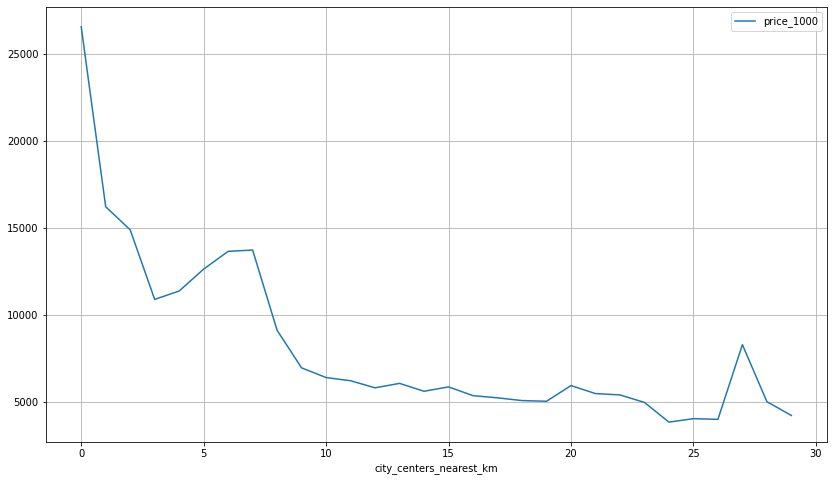

In [91]:
price_km_spb.plot(grid=True, figsize=(14,8)) 
plt.show()
#после скобки kind='bar',

По гистограмме видно, что на расстоянии ДО 1 (это 0 км) км от центра цена очень высока (около 26,5 млн.р за квартиру) и сильно меняется уже после 1 км. от центра (16,3 млн.р за квартиру), все, что в радиусе до 1 км от центра - это и есть "самый центр".
Есть еще одна граница, она находится в районе 8 км от самого центра, после которой следует сильное падение цены (с 14млн до 9млн) и после начинает убывать постепенно. Это и есть центральная зона (в радиусе 8 км отцентра).

### Общий вывод

В данном задании нам был дан датасет с информацией о продаже квартир в Санкт-Петербурге. 

Я проделала полную работу по подготовке данных к анализу: удалены были дубликаты, названия населенных пунктов приведены к единому регистру и правильному виду, пропуски заполнены медианой/средним там, где это было необходимо, обрезаны сильные выбросы и аномальные, нереалистичные значения, их процент невелик. А так же были добавлены новые столбцы в таблицу.

Добавленные столбцы: цена квадратного метра; день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, отношение площади кухни к общей.


Мной был проведен анализ и сделаны выводы по заданым вопросам:

Больше всего квартир с площадями 30-46 кв.м - это, похоже, самые популярные 1 и 2-х комнатные. Далее идут скорее всего 2 и 3 комнатные с площадью до 75 кв.м.

Сделан вывод, что больше всего квартир продаются по цене в диапазоне 1,8-7,5 млн.руб. Пик же продажи квартир идет в по цене около 3,8 мнн.

Самые популярные квартиры - 1комнатная(чуть больше 8000) и 2комнатные(около 8000). 3комнатных тоже довольно много - чуть меньше 6000, ну а дальше кол-во сильно сокращаетя.

Больше всего квартир с высотой потолков 250 - 300 см, подавляющее большинство почти половина с высотой 265 см.

Факторы больше всего влияющие на стоимость квартиры: Больше всего на стоимость квартиры влияет её площадь(прямопропорцианальная зависимость). Среднее влияние оказывает удаленность от центра(обратнопропорцианальная зависимость) и количество комнат (особенно хорошо видна прямопропорцианальная зависимость на отрезке 1-3 комнаты, все что выше уже не коррелирует). Также надо отметить, что есть зависимость от этажа - первый этаж мало кто любит и цена его существенно отличается от остальных; люди предпочитают не первый и не последний этаж - его цена выше(но на немного выше последнего).

Подавляющее большинство квартир продается в Питере - 15712, а цена около 113500р/кв.м. Помимо Питера в Топ10 входят: поселок Мурино, поселок Шушары, Всеволожск, Пушкин, Колпино, поселок Парголово, Гатчина, деревня Кудрово, Выборг с ценами 58000 - 85500р/кв.м

В ходе анализа квартир в центре Питера было выявлено - что на расстоянии ДО 1 (это 0 км) км от центра цена очень высока (около 26,5 млн.р за квартиру) и сильно меняется уже после 1 км. от центра (16,3 млн.р за квартиру), все, что в радиусе до 1 км от центра - это и есть "самый центр".